<a href="https://colab.research.google.com/github/jhoanse/testamazonia/blob/main/ForecastAmazonia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Forecast SAM 2022

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Python libraries import

In [ ]:
pip install -U arrow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 64 kB 2.1 MB/s 


In [ ]:
pip install netcdf4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas.testing as tm

In [ ]:
pip install paramiko

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 212 kB 9.2 MB/s 
     |████████████████████████████████| 62 kB 878 kB/s 
     |████████████████████████████████| 856 kB 38.8 MB/s 
     |████████████████████████████████| 4.0 MB 43.7 MB/s 


In [ ]:
import paramiko

In [ ]:
pwd

'/content'

In [ ]:
cd /content/drive/MyDrive/FSSforecastSAM

/content/drive/MyDrive/FSSforecastSAM


In [ ]:
import Utils
import getMODfiredata
import getOCIs
import calFireRegsum
import deriveForecastmodel
import doFSSforecast
import Vis

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## ONI and AMO time series

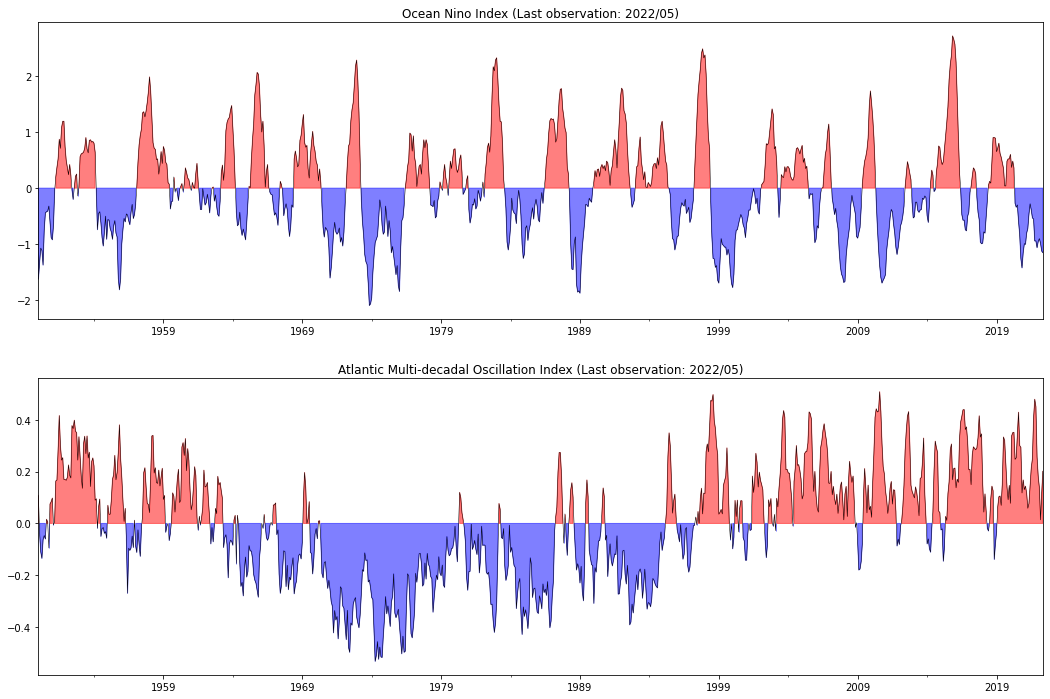

In [ ]:
Vis.ts_ONIAMO()

## Single-month forecast

In [ ]:
# define time
yr_now=2022  # current year
mo_now=5     # current month
yr_tgt=2022  # target FSS year
yed_mod=2020 # end year of the regression model used

# do forecast
daden = doFSSforecast.predict_1yr(yr_now,mo_now,yr_tgt,yed_mod)

# read observations for previous years
dfFSS = calFireRegsum.cal_FSS_REG(yed=yr_now-2)
dadenobs = Utils.convert_todensity(dfFSS) # convert to density

/content/drive/MyDrive/FSSforecastSAM/Vis.py:24: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  t_tgt = pd.Timestamp(str(yr_tgt)+'-01-01', freq='AS-JAN')
/content/drive/MyDrive/FSSforecastSAM/Vis.py:24: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  t_tgt = pd.Timestamp(str(yr_tgt)+'-01-01', freq='AS-JAN')
/content/drive/MyDrive/FSSforecastSAM/Vis.py:24: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  t_tgt = pd.Timestamp(str(yr_tgt)+'-01-01', freq='AS-JAN')
/content/drive/MyDrive/FSSforecastSAM/Vis.py:24: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  t_tgt = pd.Timestamp(str(yr_tgt)+'-01-01', freq='AS-JAN')
/content/drive/MyDrive/FSSforecastSAM/Vis.py:24: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.


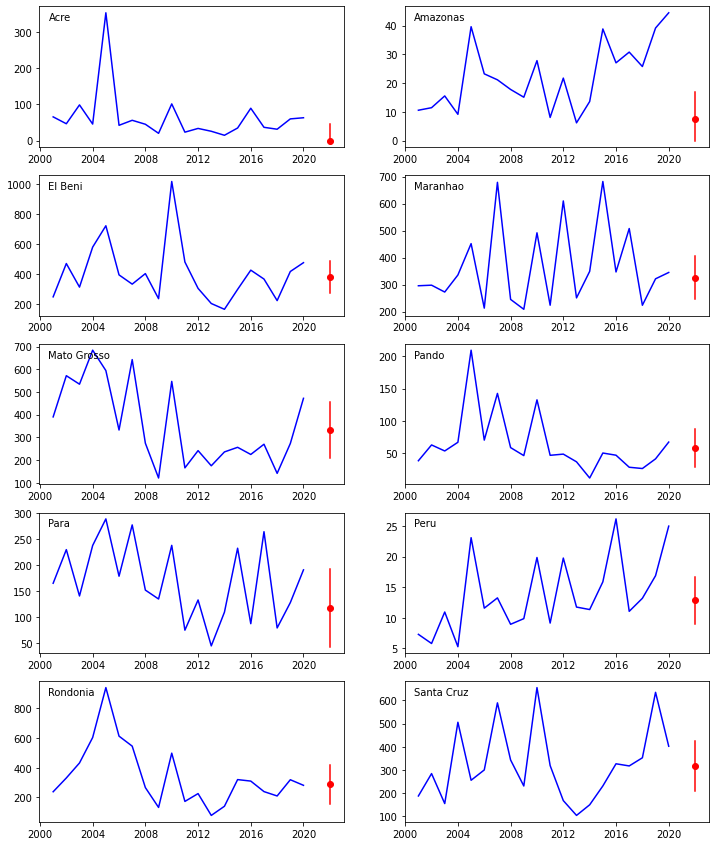

In [ ]:
Vis.ts_predict_1yr(daden,dadenobs,yr_tgt)

## Forecasts for different years at the same forecast lead

### 2022 FSS and before

In [ ]:
# forecast example (1-month)
yr_now=2022  # current year
mo_now=5     # current month
yr_tgt=2022  # target FSS year
yed_mod=2020 # end year of the regression model used

# get mean forecast for all years
dadenmean_allyr = doFSSforecast.predict_myr(yr_now,mo_now,yr_tgt,yed_mod)

# read observation
dfFSS = calFireRegsum.cal_FSS_REG(yed=yr_now-2)
dadenobs = Utils.convert_todensity(dfFSS)

# get mean and range of forecast for final year 
daden = doFSSforecast.predict_1yr(yr_now,mo_now,yr_tgt,yed_mod)

/content/drive/MyDrive/FSSforecastSAM/Vis.py:45: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  t_tgt = pd.Timestamp(str(yr_tgt)+'-01-01', freq='AS-JAN')
/content/drive/MyDrive/FSSforecastSAM/Vis.py:45: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  t_tgt = pd.Timestamp(str(yr_tgt)+'-01-01', freq='AS-JAN')
/content/drive/MyDrive/FSSforecastSAM/Vis.py:45: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  t_tgt = pd.Timestamp(str(yr_tgt)+'-01-01', freq='AS-JAN')
/content/drive/MyDrive/FSSforecastSAM/Vis.py:45: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  t_tgt = pd.Timestamp(str(yr_tgt)+'-01-01', freq='AS-JAN')
/content/drive/MyDrive/FSSforecastSAM/Vis.py:45: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.


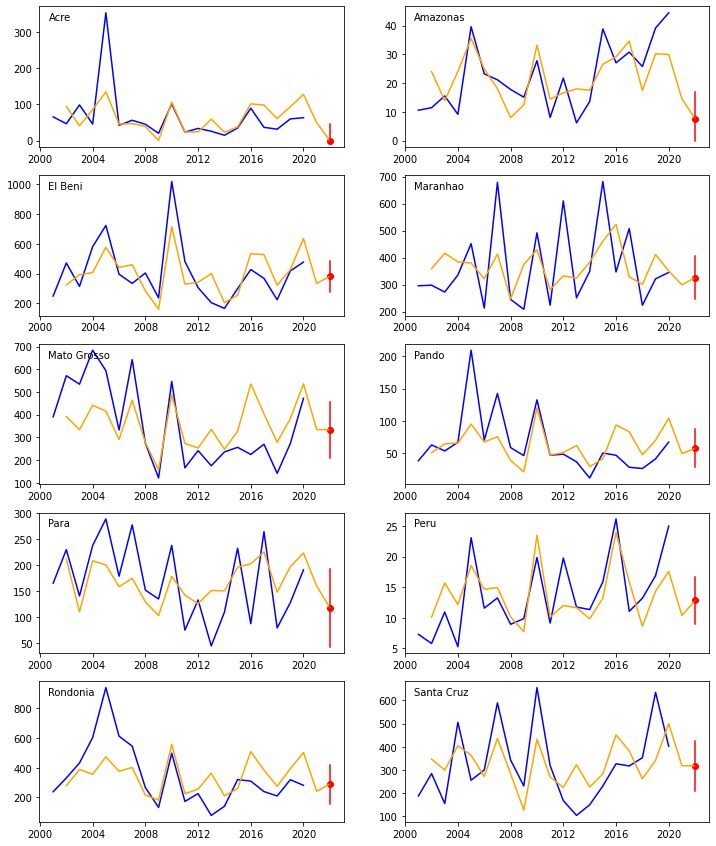

In [ ]:
Vis.ts_predict_myr(dadenmean_allyr,daden,dadenobs,yr_tgt)

In [ ]:
daden

,Ac,Am,EB,Ma,MT,Pd,Pa,Pe,Ro,SC
mean,0.000000,7.661366,382.451244,326.119410,333.525160,57.168506,118.599380,12.846428,289.935144,317.908852
max,0.000000,0.000000,278.525256,246.296956,209.437967,27.548744,43.744848,8.935839,158.418121,209.957455
min,44.633256,16.941335,486.377232,405.941865,457.612352,86.788269,193.453912,16.757017,421.452167,425.860249


In [ ]:
dadenmean_allyr

,Ac,Am,EB,Ma,MT,Pd,Pa,Pe,Ro,SC
2002-01-01,94.223754,23.991904,323.920881,358.830960,392.002820,50.248771,212.369390,10.100195,278.643087,347.010769
2003-01-01,40.621181,13.896803,392.784338,416.485887,334.071593,64.044445,110.612287,15.718803,388.319066,299.485460
2004-01-01,85.666092,24.057603,407.089677,384.404050,441.652905,65.423005,209.053791,12.170899,355.771597,404.753576
2005-01-01,134.781242,35.522371,576.535338,380.160731,415.811116,94.787905,200.993932,18.542880,473.668766,363.414159
2006-01-01,45.475113,24.879283,440.940494,321.749444,291.000587,67.019703,159.199026,14.660088,375.945785,271.773775
2007-01-01,47.137855,18.047365,460.209697,413.204132,463.995731,75.256592,175.313325,14.965443,401.867929,436.490967
2008-01-01,38.944982,7.960582,283.515166,247.292203,277.431670,38.434580,129.961289,10.159304,215.479104,283.562125
2009-01-01,0.000000,12.416127,160.796605,374.651064,156.551115,20.497161,103.481769,7.741398,182.025489,126.358037
2010-01-01,106.290156,33.165724,714.531125,429.611270,487.804026,120.079578,179.123980,23.521131,558.484213,432.732618
2011-01-01,23.498982,14.425033,329.905971,280.989236,273.554693,46.586514,142.986417,10.131811,224.479823,269.716968


In [ ]:
dfFSS

,Ac,Am,EB,Ma,MT,Pd,Pa,Pe,Ro,SC
2001-01-01,1018.0,1673.0,5297.0,9817.0,35741.0,247.0,20720.0,960.0,5771.0,6912.0
2002-01-01,723.0,1813.0,10001.0,9887.0,52366.0,407.0,28804.0,764.0,8024.0,10466.0
2003-01-01,1531.0,2461.0,6671.0,9045.0,48939.0,346.0,17664.0,1439.0,10473.0,5705.0
2004-01-01,709.0,1448.0,12320.0,11138.0,62657.0,434.0,29799.0,695.0,14630.0,18622.0
2005-01-01,5483.0,6275.0,15335.0,14989.0,54432.0,1367.0,36192.0,3033.0,22783.0,9408.0
2006-01-01,656.0,3678.0,8396.0,7070.0,30446.0,456.0,22415.0,1522.0,14853.0,11048.0
2007-01-01,871.0,3349.0,7092.0,22517.0,58861.0,929.0,34746.0,1742.0,13221.0,21705.0
2008-01-01,701.0,2818.0,8579.0,8141.0,25117.0,380.0,19076.0,1176.0,6451.0,12631.0
2009-01-01,312.0,2390.0,5038.0,6926.0,11082.0,299.0,16935.0,1297.0,3210.0,8497.0
2010-01-01,1574.0,4406.0,21590.0,16317.0,50069.0,864.0,29833.0,2608.0,12075.0,24129.0


In [ ]:
dadenobs

,Ac,Am,EB,Ma,MT,Pd,Pa,Pe,Ro,SC
2001-01-01,65.550547,10.553208,249.740688,295.871007,390.313421,37.883436,165.799792,7.310944,238.077558,187.724063
2002-01-01,46.555055,11.436321,471.522867,297.980711,571.868516,62.423313,230.487317,5.818293,331.023102,284.247691
2003-01-01,98.583387,15.523876,314.521452,272.603978,534.443595,53.067485,141.345923,10.958800,432.054455,154.942966
2004-01-01,45.653574,9.133918,580.858086,335.684147,684.252484,66.564417,238.449228,5.292819,603.547855,505.757740
2005-01-01,353.058596,39.582413,723.008015,451.748041,594.430490,209.662577,289.605505,23.098012,939.892739,255.513308
2006-01-01,42.240824,23.200656,395.851014,213.080169,332.488806,69.938650,179.363047,11.590892,612.747525,300.054318
2007-01-01,56.084997,21.125339,334.370580,678.631706,642.797860,142.484663,278.034728,13.266316,545.420792,589.489408
2008-01-01,45.138442,17.775815,404.479019,245.358650,274.292891,58.282209,152.644635,8.955906,266.130363,343.047257
2009-01-01,20.090148,15.076011,237.529467,208.740205,121.022169,45.858896,135.512523,9.877389,132.425743,230.771320
2010-01-01,101.352222,27.792847,1017.916077,491.772152,546.783881,132.515337,238.721293,19.861397,498.143564,655.323194


In [ ]:
# Save the file daden

compression_opts = dict(method='zip',
                        archive_name='daden.csv')  
daden.to_csv('daden_may.zip', index=True,
          compression=compression_opts)